In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd


file_path = '/content/sample_data/solargis_pvpotential_countryranking_2020_data.xlsx'
df = pd.read_excel(file_path)


df = df.dropna()


print(df.head())


    Unnamed: 0         Unnamed: 1           Unnamed: 2           Unnamed: 3  \
0       ISO_A3  Country or region                 Note  World Bank \nRegion   
7          ARG          Argentina  up to parallel 45°S                  LCR   
33         CAN             Canada  up to parallel 60°N                Other   
35         CHL              Chile  up to parallel 45°S                  LCR   
138        NOR             Norway  up to parallel 60°N                Other   

           Basic indicators        Unnamed: 5      Unnamed: 6  \
0    Total population, 2018  Total area, 2018  Evaluated area   
7                  44494502           2736690         2475393   
33                 37058856           9093510         5785872   
35                 18729160            743532          536574   
138                 5314336            365123           54569   

                               Unnamed: 7                       Unnamed: 8  \
0    Level 1 area \n(% of evaluated area)  Human develop

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/sample_data/solargis_pvpotential_countryranking_2020_data.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows and column names
print("Dataset Overview:")
print(df.head())
print("\nColumn Names:")
print(df.columns)


Dataset Overview:
  Unnamed: 0         Unnamed: 1 Unnamed: 2           Unnamed: 3  \
0     ISO_A3  Country or region       Note  World Bank \nRegion   
1        ABW      Aruba (Neth.)        NaN                Other   
2        AFG        Afghanistan        NaN                  SOA   
3        AGO             Angola        NaN                  AFR   
4        ALB            Albania        NaN                  ECA   

         Basic indicators        Unnamed: 5      Unnamed: 6  \
0  Total population, 2018  Total area, 2018  Evaluated area   
1                  105845               180             180   
2                37172386            652860          652860   
3                30809762           1246700         1246700   
4                 2866376             27400           27400   

                             Unnamed: 7                       Unnamed: 8  \
0  Level 1 area \n(% of evaluated area)  Human development \nIndex, 2017   
1                              0.847926         

In [ ]:
# Reload the dataset and skip unnecessary rows
df = pd.read_excel(file_path, header=1)  # Adjust `header` based on the row with actual headers
print("Updated Column Names:")
print(df.columns)


Updated Column Names:
Index(['ISO_A3', 'Country or region', 'Note', 'World Bank \nRegion',
       'Total population, 2018', 'Total area, 2018', 'Evaluated area',
       'Level 1 area \n(% of evaluated area)',
       'Human development \nIndex, 2017',
       'Gross domestic product (USD per capita), 2018',
       'Average theoretical potential (GHI, kWh/m2/day), \nlong-term',
       'Average practical potential \n(PVOUT Level 1, \nkWh/kWp/day), long-term',
       'Average economic potential (LCOE, USD/kWh), 2018',
       'Average PV \nseasonality index, long-term',
       'PV equivalent area (% of total area), long-term',
       'Cummulative installed PV capacity (MWp), 2018',
       'Cummulative installed PV capacity (Wp per capita), 2018',
       'Access to electricity\n(% of rural population), 2016',
       'Electric power consumption (kWh per capita), 2014',
       'Reliability of supply and transparency of tariff index, 2019',
       'Approximate electricity \nTariffs for SMEs \n(U

In [ ]:

df.columns = [
    "ISO_A3", "Country", "Note", "Region", "Population_2018", "Total_Area",
    "Evaluated_Area", "Level_1_Area_Percentage", "HDI_2017", "GDP_per_Capita_2018",
    "Practical_Potential_PVOUT", "Economic_Potential_LCOE", "Seasonality_Index",
    "PV_Equivalent_Area", "Installed_PV_Capacity_MWp", "Installed_PV_Capacity_per_Capita",
    "Access_to_Electricity_Rural", "Power_Consumption_per_Capita", "Supply_Reliability",
    "Electricity_Tariff", "Extra_Column"
]


df_cleaned = df.drop(columns=["Note", "Extra_Column"], errors="ignore")

# Display cleaned dataset structure
print("Cleaned Dataset Columns:")
print(df_cleaned.columns)


Cleaned Dataset Columns:
Index(['ISO_A3', 'Country', 'Region', 'Population_2018', 'Total_Area',
       'Evaluated_Area', 'Level_1_Area_Percentage', 'HDI_2017',
       'GDP_per_Capita_2018', 'Practical_Potential_PVOUT',
       'Economic_Potential_LCOE', 'Seasonality_Index', 'PV_Equivalent_Area',
       'Installed_PV_Capacity_MWp', 'Installed_PV_Capacity_per_Capita',
       'Access_to_Electricity_Rural', 'Power_Consumption_per_Capita',
       'Supply_Reliability', 'Electricity_Tariff'],
      dtype='object')


In [ ]:
# Filter data for Tunisia
tunisia_data = df_cleaned[df_cleaned["Country"] == "Tunisia"]

# Display key metrics for Tunisia
print("Tunisia's Data:")
print(tunisia_data[[
    "Practical_Potential_PVOUT", "Economic_Potential_LCOE",
    "Installed_PV_Capacity_MWp", "Power_Consumption_per_Capita"
]])


Tunisia's Data:
     Practical_Potential_PVOUT  Economic_Potential_LCOE  \
188                     5.3011                   4.7445   

     Installed_PV_Capacity_MWp  Power_Consumption_per_Capita  
188                      0.068                         100.0  


In [ ]:
# Top countries by Practical PV Potential
top_countries_pvout = df_cleaned.nlargest(10, "Practical_Potential_PVOUT")

print("Top 10 Countries by Practical PV Potential:")
print(top_countries_pvout[["Country", "Practical_Potential_PVOUT"]])

# Top countries by Installed PV Capacity
top_countries_installed = df_cleaned.nlargest(10, "Installed_PV_Capacity_MWp")

print("\nTop 10 Countries by Installed PV Capacity:")
print(top_countries_installed[["Country", "Installed_PV_Capacity_MWp"]])


Top 10 Countries by Practical PV Potential:
                    Country  Practical_Potential_PVOUT
205       Republic of Yemen                     6.4675
131                 Namibia                     6.4047
160                   Sudan                     6.3227
141                    Oman                     6.2779
133                   Niger                     6.2647
180                    Chad                     6.2617
56   Arab Republic of Egypt                     6.2591
159            Saudi Arabia                     6.2080
104                   Libya                     6.1345
97                 Kiribati                     6.1258

Top 10 Countries by Installed PV Capacity:
               Country  Installed_PV_Capacity_MWp
162          Singapore                     35.190
77      Hong Kong, SAR                     29.378
19             Bahrain                     20.002
136        Netherlands                      6.646
110         Luxembourg                      5.684
14     

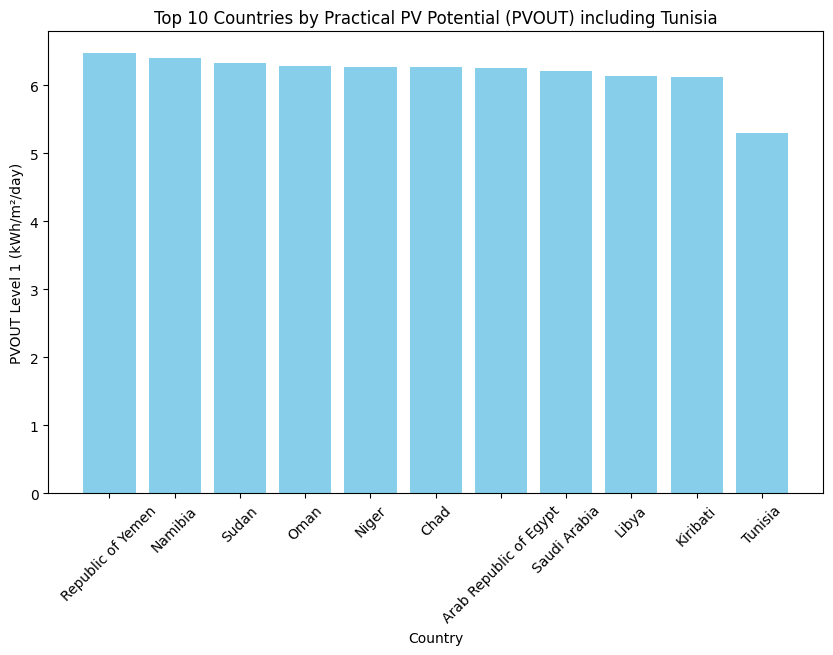

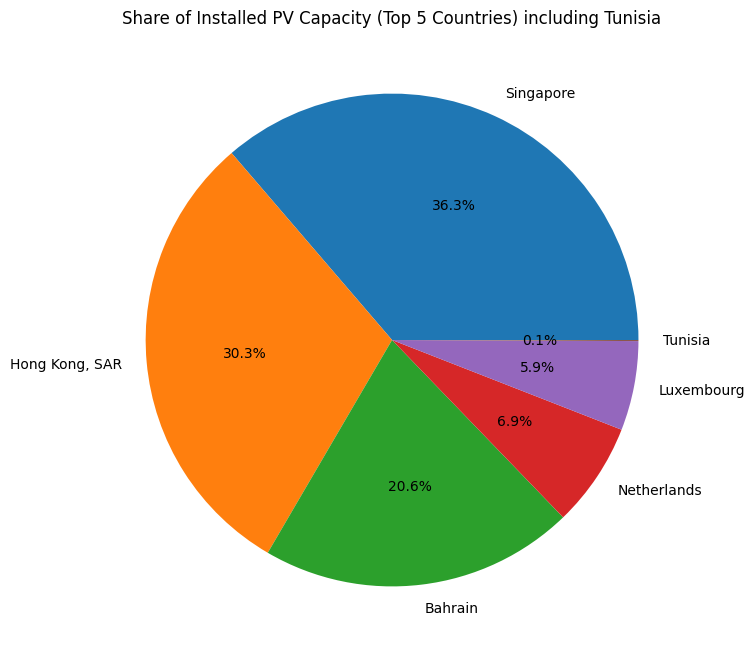

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Include Tunisia in the comparison with the top 10 countries by Practical PV Potential (PVOUT)
tunisia_pvout = df_cleaned[df_cleaned["Country"] == "Tunisia"]
top_countries_pvout_with_tunisia = pd.concat([top_countries_pvout, tunisia_pvout])

# Bar chart: Top 10 Countries by Practical PV Potential including Tunisia
plt.figure(figsize=(10, 6))
plt.bar(top_countries_pvout_with_tunisia["Country"], top_countries_pvout_with_tunisia["Practical_Potential_PVOUT"], color="skyblue")
plt.title("Top 10 Countries by Practical PV Potential (PVOUT) including Tunisia")
plt.xlabel("Country")
plt.ylabel("PVOUT Level 1 (kWh/m²/day)")
plt.xticks(rotation=45)
plt.show()

# Include Tunisia in the comparison with the top 5 countries by Installed PV Capacity
tunisia_installed = df_cleaned[df_cleaned["Country"] == "Tunisia"]
top_5_installed_with_tunisia = pd.concat([top_5_installed, tunisia_installed])

# Pie chart: Share of Installed PV Capacity for Top 5 Countries including Tunisia
plt.figure(figsize=(8, 8))
plt.pie(top_5_installed_with_tunisia["Installed_PV_Capacity_MWp"], labels=top_5_installed_with_tunisia["Country"], autopct="%1.1f%%", colors=plt.cm.tab10.colors)
plt.title("Share of Installed PV Capacity (Top 5 Countries) including Tunisia")
plt.show()


In [ ]:
# Filter data for Tunisia
tunisia_data = df_cleaned[df_cleaned["Country"] == "Tunisia"]

# Display Tunisia's data for key columns
print("Tunisia's Data Overview:")
print(tunisia_data[[
    "Country", "Population_2018", "GDP_per_Capita_2018",
    "Practical_Potential_PVOUT", "Economic_Potential_LCOE",
    "Installed_PV_Capacity_MWp", "Power_Consumption_per_Capita"
]])


Tunisia's Data Overview:
     Country  Population_2018  GDP_per_Capita_2018  Practical_Potential_PVOUT  \
188  Tunisia         11565204          3446.607238                     5.3011   

     Economic_Potential_LCOE  Installed_PV_Capacity_MWp  \
188                   4.7445                      0.068   

     Power_Consumption_per_Capita  
188                         100.0  


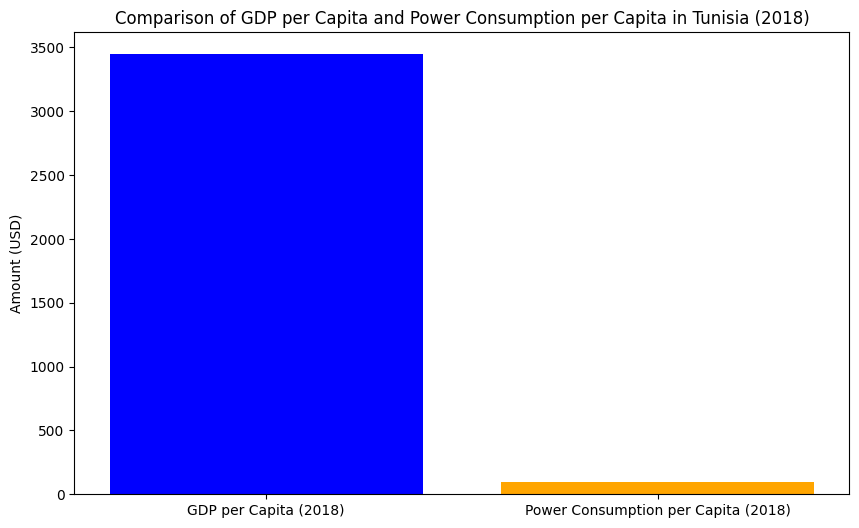

In [ ]:
# Bar chart: GDP per Capita and Power Consumption for Tunisia
plt.figure(figsize=(10, 6))

# Bar chart for GDP and Power Consumption
plt.bar(["GDP per Capita (2018)", "Power Consumption per Capita (2018)"],
        [tunisia_data["GDP_per_Capita_2018"].values[0], tunisia_data["Power_Consumption_per_Capita"].values[0]],
        color=["blue", "orange"])

plt.title("Comparison of GDP per Capita and Power Consumption per Capita in Tunisia (2018)")
plt.ylabel("Amount (USD)")
plt.show()


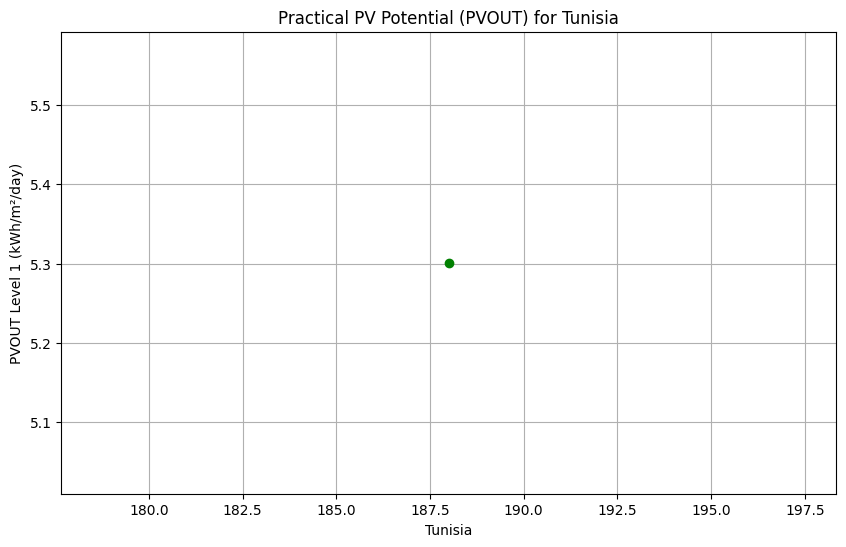

In [ ]:
# Line chart: Practical PV Potential (PVOUT) for Tunisia
plt.figure(figsize=(10, 6))
plt.plot(tunisia_data["Practical_Potential_PVOUT"], marker='o', color='green')
plt.title("Practical PV Potential (PVOUT) for Tunisia")
plt.xlabel("Tunisia")
plt.ylabel("PVOUT Level 1 (kWh/m²/day)")
plt.grid(True)
plt.show()


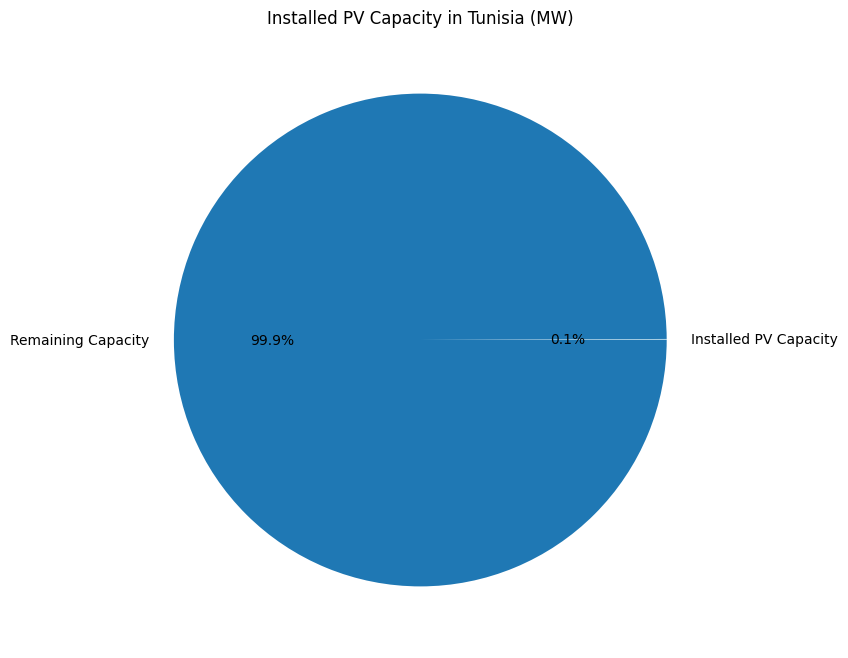

In [ ]:
# Pie chart: Installed PV Capacity for Tunisia
plt.figure(figsize=(8, 8))
plt.pie([tunisia_data["Installed_PV_Capacity_MWp"].values[0], 100 - tunisia_data["Installed_PV_Capacity_MWp"].values[0]],
        labels=["Installed PV Capacity", "Remaining Capacity"], autopct="%1.1f%%", colors=plt.cm.Paired.colors)
plt.title("Installed PV Capacity in Tunisia (MW)")
plt.show()


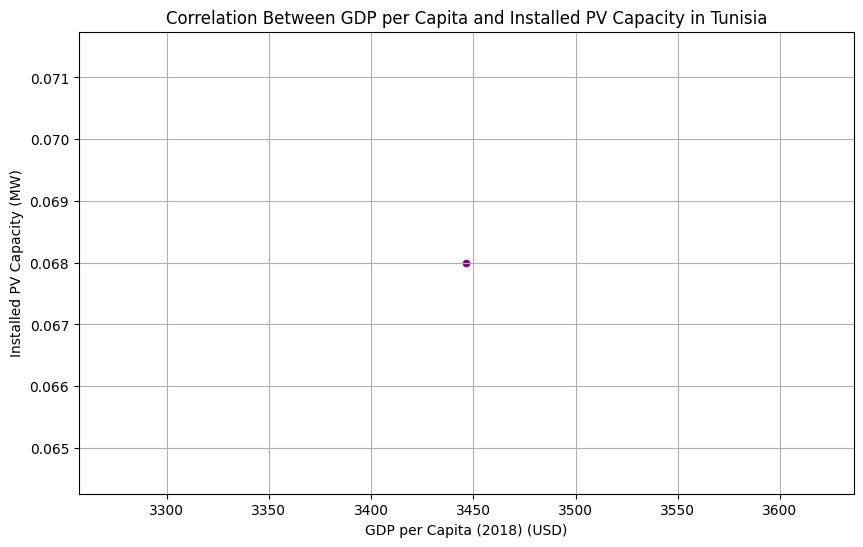

In [ ]:
import seaborn as sns

# Scatter plot to analyze the correlation between GDP per Capita and Installed PV Capacity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tunisia_data["GDP_per_Capita_2018"],
                y=tunisia_data["Installed_PV_Capacity_MWp"],
                color='purple')

plt.title("Correlation Between GDP per Capita and Installed PV Capacity in Tunisia")
plt.xlabel("GDP per Capita (2018) (USD)")
plt.ylabel("Installed PV Capacity (MW)")
plt.grid(True)
plt.show()
